In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
import matplotlib as mpl
import missingno as msno

# Nettoyage et analyse

In [2]:
d1 = pd.read_csv("application_train.csv")

(307511, 122)


ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (122).

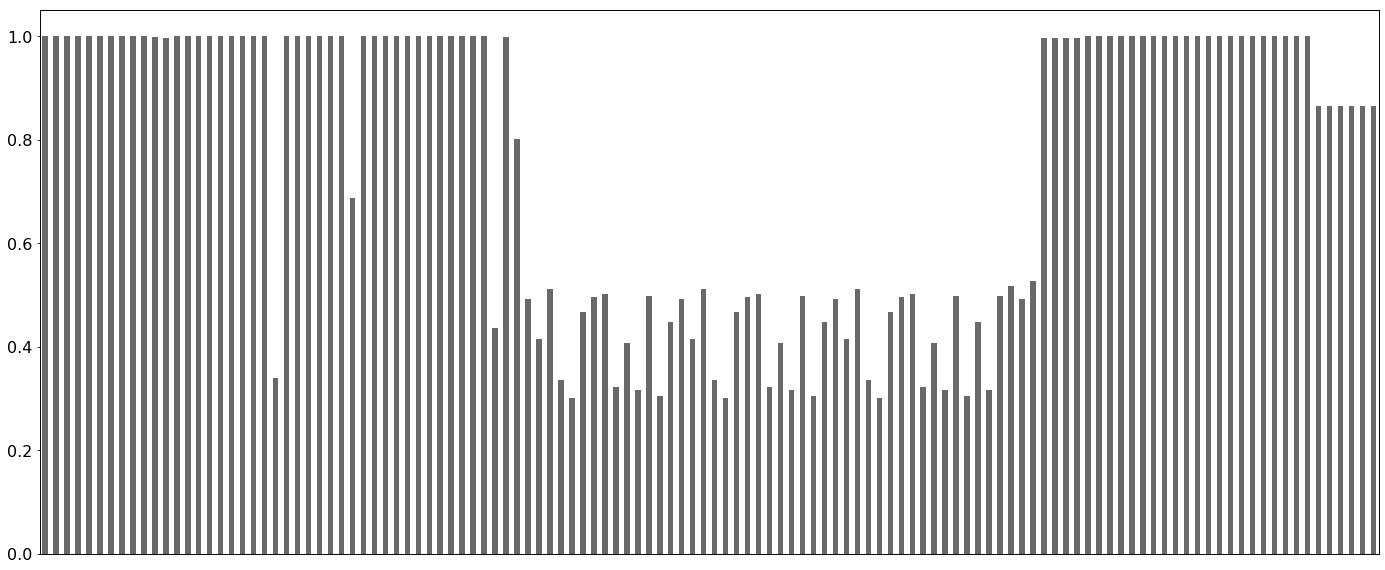

In [138]:
print(d1.shape)
msno.bar(d1)

In [16]:
# FOnction affichant le taux de valeur manquante
def taux_manque(x):
    return x.isnull().sum()/d1.shape[0]*100

# Afficher toute la liste
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # On applique cette fonction pour chaque colonne:
    print("Pourcentage de valeurs manquantes par colonne:")
    print(d1.apply(taux_manque, axis=0).sort_values())

Pourcentage de valeurs manquantes par colonne:
SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7              

Il y a 27 colonnes qui ont un taux de valeur manquante supérieur à 55%. Regardons les de plus près avant de les supprimer

In [71]:
# Extraire tableau avec valeur manquantes superieur ou égale à 55%
df_nan = d1.loc[:, d1.isnull().sum() >= 0.55*d1.shape[0]]

# Extraire la colonne TARGET et merger avec le df précédent suivant l'index
df_tar = d1['TARGET']
df_nan = df_nan.merge(df_tar, how='inner', left_index=True, right_index=True)

In [72]:
df_nan

,OWN_CAR_AGE,EXT_SOURCE_1,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,...,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,TARGET
0,NaN,0.083037,0.0369,0.6192,0.0143,0.1250,0.0369,0.0202,0.0000,0.0000,...,0.0369,0.6243,0.0144,0.1250,0.0375,0.0205,0.0000,0.0000,reg oper account,1
1,NaN,0.311267,0.0529,0.7960,0.0605,0.3333,0.0130,0.0773,0.0039,0.0098,...,0.0529,0.7987,0.0608,0.3333,0.0132,0.0787,0.0039,0.0100,reg oper account,0
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,0.145570,0.0887,0.8300,0.0202,0.2708,0.0594,0.1484,0.0753,0.1095,...,0.0887,0.8323,0.0203,0.2708,0.0605,0.1509,0.0757,0.1118,reg oper account,0
307507,NaN,NaN,0.0435,0.6260,0.0022,0.1250,0.0579,0.0202,0.0000,0.0000,...,0.0435,0.6310,0.0022,0.1250,0.0589,0.0205,0.0000,0.0000,reg oper account,0
307508,NaN,0.744026,0.0862,0.7484,0.0123,0.2083,NaN,0.0841,0.0000,0.0000,...,0.0862,0.7518,0.0124,0.2083,NaN,0.0855,0.0000,0.0000,reg oper account,0
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [76]:
# voir la matrice de correlation pour voir s'il y a correlation avec la target
corr_df = df_nan.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,OWN_CAR_AGE,EXT_SOURCE_1,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TARGET
OWN_CAR_AGE,1.000000,-0.083411,-0.033365,-0.049068,-0.035524,-0.075332,-0.021657,-0.050553,-0.024806,-0.031386,-0.027320,-0.047274,-0.030161,-0.072489,-0.019343,-0.044226,-0.022010,-0.027811,-0.032011,-0.048787,-0.035066,-0.075454,-0.021645,-0.050121,-0.024251,-0.030684,0.037612
EXT_SOURCE_1,-0.083411,1.000000,0.039962,0.017102,0.033381,0.074462,0.005494,0.045852,0.015851,0.031500,0.034692,0.015704,0.027538,0.071390,0.002426,0.039022,0.013858,0.026420,0.039494,0.016689,0.032147,0.073583,0.004992,0.044368,0.015263,0.030375,-0.155317
BASEMENTAREA_AVG,-0.033365,0.039962,1.000000,0.248610,0.405459,0.220908,0.467661,0.646774,0.095418,0.266349,0.973496,0.249285,0.402106,0.218307,0.461969,0.647432,0.094249,0.260047,0.994317,0.247836,0.406592,0.219523,0.469994,0.648802,0.095287,0.265382,-0.022746
YEARS_BUILD_AVG,-0.049068,0.017102,0.248610,1.000000,0.232259,0.359538,0.180621,0.333937,0.070929,0.127709,0.233864,0.989444,0.223498,0.352092,0.170190,0.326195,0.064494,0.112257,0.246441,0.998495,0.232810,0.358984,0.181592,0.334945,0.069234,0.124901,-0.022149
COMMONAREA_AVG,-0.035524,0.033381,0.405459,0.232259,1.000000,0.295657,0.257046,0.533103,0.105582,0.227615,0.388210,0.229358,0.977147,0.288792,0.244198,0.526574,0.103457,0.217018,0.404549,0.231841,0.995978,0.294866,0.258217,0.534454,0.105081,0.227138,-0.018550
FLOORSMIN_AVG,-0.075332,0.074462,0.220908,0.359538,0.295657,1.000000,0.148223,0.438715,0.075801,0.153111,0.197463,0.352273,0.275966,0.985875,0.138764,0.425371,0.068778,0.130329,0.217516,0.358756,0.293962,0.997241,0.150133,0.438320,0.073882,0.146178,-0.033614
LANDAREA_AVG,-0.021657,0.005494,0.467661,0.180621,0.257046,0.148223,1.000000,0.420084,0.065855,0.163538,0.471004,0.183510,0.267294,0.150629,0.973696,0.434479,0.064897,0.162193,0.469117,0.180393,0.259076,0.148545,0.991610,0.423248,0.064650,0.164797,-0.010885
LIVINGAPARTMENTS_AVG,-0.050553,0.045852,0.646774,0.333937,0.533103,0.438715,0.420084,1.000000,0.160469,0.293276,0.624852,0.332021,0.523099,0.430224,0.411131,0.970117,0.145175,0.275961,0.646859,0.332756,0.533564,0.436874,0.422522,0.993825,0.156555,0.290558,-0.025031
NONLIVINGAPARTMENTS_AVG,-0.024806,0.015851,0.095418,0.070929,0.105582,0.075801,0.065855,0.160469,1.000000,0.217269,0.090195,0.069648,0.102766,0.072517,0.061270,0.141176,0.969370,0.208097,0.094879,0.070491,0.105544,0.075320,0.067739,0.156409,0.990768,0.216707,-0.003176
NONLIVINGAREA_AVG,-0.031386,0.031500,0.266349,0.127709,0.227615,0.153111,0.163538,0.293276,0.217269,1.000000,0.256550,0.125303,0.220285,0.146900,0.157147,0.285494,0.210196,0.966087,0.265949,0.127783,0.227574,0.152033,0.163489,0.293841,0.217242,0.990444,-0.013578


La plupart des colonnes avec beaucoup de valeurs manquantes contiennent des informations sur l'habitation et ont une corrélation de presque 0 avec la target (sauf EXT_SOURCE_1) nous pouvons donc les supprimer

In [35]:
# Suppression des colonnes ayant plus de 58% de NaN
d1 = d1.loc[:, d1.isnull().sum() <= 0.58*d1.shape[0]]

d1.drop(["NONLIVINGAREA_MODE", "NONLIVINGAREA_AVG", "NONLIVINGAREA_MEDI"], axis =1, inplace = True)

De la même manière nous allons supprimer les autres colonnes concernant les informations sur le lieu d'habitation 

In [36]:
d1 = d1.loc[:, ~d1.columns.str.endswith('_MODE')]
d1 = d1.loc[:, ~d1.columns.str.endswith('_AVG')]
d1 = d1.loc[:, ~d1.columns.str.endswith('_MEDI')]

In [100]:
df_doc = d1.filter(regex='FLAG_DOCUMENT',axis=1)

df_doc = df_doc.merge(df_tar, how='inner', left_index=True, right_index=True)

In [101]:
corr_df = df_doc.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
FLAG_DOCUMENT_2,1.000000,-0.010174,-0.000059,-0.000805,-0.002020,-0.000090,-0.001935,-0.000407,-0.000031,-0.000407,-0.000017,-0.000387,-0.000353,-0.000226,-0.000651,-0.000106,-0.000589,-0.000159,-0.000146,-0.000119,0.005417
FLAG_DOCUMENT_3,-0.010174,1.000000,-0.014110,-0.193850,-0.486238,-0.021677,-0.465730,-0.097859,-0.007466,-0.093242,-0.001180,-0.020274,0.002099,0.000592,0.033418,0.002536,0.007976,0.009423,0.007396,-0.025510,0.044346
FLAG_DOCUMENT_4,-0.000059,-0.014110,1.000000,-0.001117,-0.002802,-0.000125,-0.002684,-0.000564,-0.000043,-0.000565,-0.000023,-0.000536,-0.000489,-0.000314,-0.000903,-0.000147,-0.000816,-0.000220,-0.000203,-0.000165,-0.002672
FLAG_DOCUMENT_5,-0.000805,-0.193850,-0.001117,1.000000,-0.038495,-0.001716,-0.036871,-0.007747,-0.000591,-0.007764,-0.000316,-0.007368,-0.006723,-0.004311,-0.012137,-0.002023,-0.010622,-0.003023,-0.002791,0.000645,-0.000316
FLAG_DOCUMENT_6,-0.002020,-0.486238,-0.002802,-0.038495,1.000000,-0.004305,-0.092485,-0.019433,-0.001483,-0.018738,-0.000792,-0.017514,-0.014318,-0.009824,-0.026603,-0.004372,-0.023915,-0.004759,-0.005981,-0.005688,-0.028602
FLAG_DOCUMENT_7,-0.000090,-0.021677,-0.000125,-0.001716,-0.004305,1.000000,-0.004123,-0.000866,-0.000066,-0.000868,-0.000035,-0.000824,-0.000752,-0.000482,-0.001387,-0.000226,-0.001254,-0.000338,-0.000312,-0.000254,-0.001520
FLAG_DOCUMENT_8,-0.001935,-0.465730,-0.002684,-0.036871,-0.092485,-0.004123,1.000000,-0.018613,-0.001420,-0.017509,0.003905,0.077019,0.030228,0.023517,0.012783,0.005338,0.007756,0.000053,0.003859,-0.001548,-0.008040
FLAG_DOCUMENT_9,-0.000407,-0.097859,-0.000564,-0.007747,-0.019433,-0.000866,-0.018613,1.000000,-0.000298,-0.003919,-0.000159,0.000684,0.001430,0.002329,0.008480,0.008570,0.001895,-0.001526,-0.001409,-0.001145,-0.004352
FLAG_DOCUMENT_10,-0.000031,-0.007466,-0.000043,-0.000591,-0.001483,-0.000066,-0.001420,-0.000298,1.000000,-0.000299,-0.000012,-0.000284,-0.000259,-0.000166,-0.000478,-0.000078,-0.000432,-0.000116,-0.000107,-0.000087,-0.001414
FLAG_DOCUMENT_11,-0.000407,-0.093242,-0.000565,-0.007764,-0.018738,-0.000868,-0.017509,-0.003919,-0.000299,1.000000,-0.000160,-0.003727,-0.003401,-0.002181,-0.006276,-0.001024,-0.005674,-0.001529,-0.001412,-0.001147,-0.004229


Encore une fois les correlations sont à 0 entre la target et les documents apportés, nous pouvons donc les supprimer également. On supprime aussi les autres objets matériel apporté dans le dossier

In [37]:
d1 = d1.loc[:, ~d1.columns.str.startswith('FLAG_')]

In [111]:
correlation = d1.corr()['TARGET'].sort_values()

correlation

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
AMT_CREDIT                    -0.030369
HOUR_APPR_PROCESS_START       -0.024166
AMT_ANNUITY                   -0.012817
AMT_REQ_CREDIT_BUREAU_MON     -0.012462
AMT_INCOME_TOTAL              -0.003982
SK_ID_CURR                    -0.002108
AMT_REQ_CREDIT_BUREAU_QRT     -0.002022
AMT_REQ_CREDIT_BUREAU_WEEK     0.000788
AMT_REQ_CREDIT_BUREAU_HOUR     0.000930
AMT_REQ_CREDIT_BUREAU_DAY      0.002704
LIVE_REGION_NOT_WORK_REGION    0.002819
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
DEF_60_CNT_SOCIAL_CIRCLE       0.031276


Garder les plus hautes correlations et ce qui semble important dans le domaine de la banque. Supprimer aussi les données que le client ne peut pas modifier (statut, nbr d'enfant...)

In [38]:
d1 = d1.drop(["REGION_POPULATION_RELATIVE", "HOUR_APPR_PROCESS_START","AMT_REQ_CREDIT_BUREAU_WEEK",
              "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","LIVE_REGION_NOT_WORK_REGION",
              "REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","OBS_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE",
              "DEF_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","LIVE_CITY_NOT_WORK_CITY","DAYS_REGISTRATION",
              "REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE",
              "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY", "NAME_TYPE_SUITE" , "NAME_INCOME_TYPE",
              "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "AMT_REQ_CREDIT_BUREAU_MON",
             "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
             "NAME_HOUSING_TYPE", "CNT_CHILDREN"], axis =1)

In [151]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SK_ID_CURR          307511 non-null  int64  
 1   TARGET              307511 non-null  int64  
 2   NAME_CONTRACT_TYPE  307511 non-null  object 
 3   AMT_INCOME_TOTAL    307511 non-null  float64
 4   AMT_CREDIT          307511 non-null  float64
 5   AMT_ANNUITY         307499 non-null  float64
 6   AMT_GOODS_PRICE     307233 non-null  float64
 7   DAYS_BIRTH          307511 non-null  int64  
 8   DAYS_EMPLOYED       307511 non-null  int64  
 9   CNT_FAM_MEMBERS     307509 non-null  float64
 10  EXT_SOURCE_1        134133 non-null  float64
 11  EXT_SOURCE_2        306851 non-null  float64
 12  EXT_SOURCE_3        246546 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 30.5+ MB


In [155]:
d1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

C:\Users\sonas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


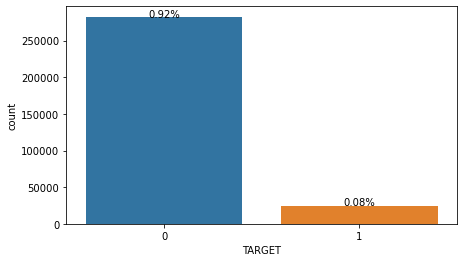

In [54]:
plt.figure(figsize = (7, 4))
ax = sns.countplot(d1["TARGET"])

total = float(len(d1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total),
            ha="center") 

0 : le client a remboursé le crédit

1 : il y a un defaut de paiement 

Il y a un deséquilibre des données car seulement 8% des clients n'ont pas remboursé le credit

C:\Users\sonas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


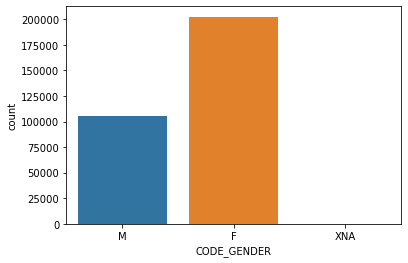

In [59]:
sns.countplot(d1['CODE_GENDER'])

In [159]:
d1["DAYS_BIRTH"].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

DAYS_BIRTH : l'âge du client en jours. On va modifier les valeurs en année

In [39]:
# Ajouter l'âge du client en année
d1["Age"] = (d1['DAYS_BIRTH']/-365)

d1["Age"].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: Age, dtype: float64

Text(0.5, 1.0, "Distribution de l'âge des clients")

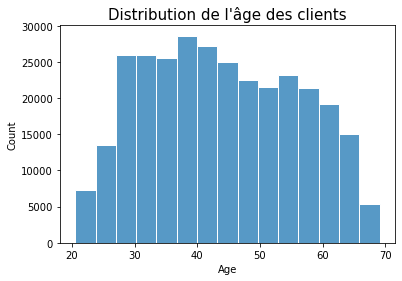

In [175]:
sns.histplot(d1["Age"], bins = 15, edgecolor = 'white')
plt.title("Distribution de l'âge des clients", size = 15)

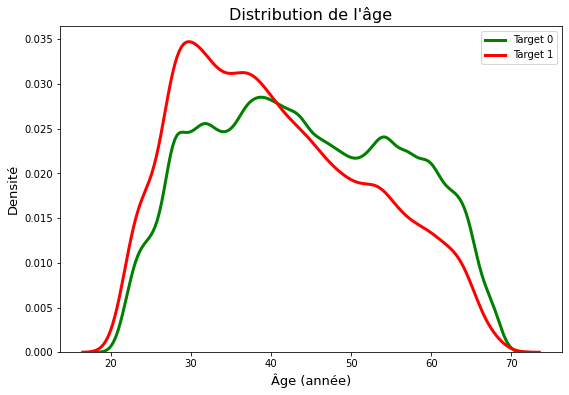

In [220]:
plt.figure(figsize = (9, 6))

sns.kdeplot(d1.loc[d1['TARGET'] == 0, 'Age'], label = 'target == 0', color = 'green', linewidth=3)
sns.kdeplot(d1.loc[d1['TARGET'] == 1, 'Age'], label = 'target == 1', color = 'red', linewidth=3)
plt.xlabel('Âge (année)', size = 13)
plt.ylabel('Densité', size = 13) 
plt.title("Distribution de l'âge", size =16)
plt.legend(labels=["Target 0","Target 1"])

On remarque que les jeunes ont plus de difficultés de paiement. En effet target = 1 est moins élévée pour les client plus âgé que pour les client plus jeune

Text(0, 0.5, 'Nombre de defaut de paiement')

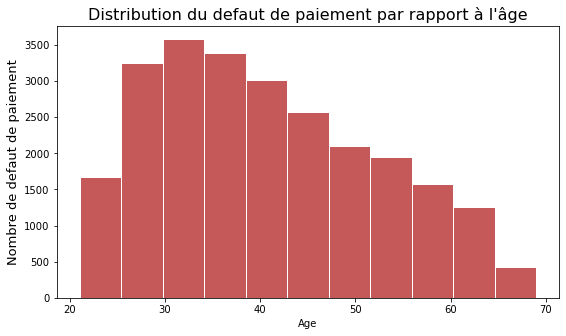

In [212]:
# isoler les defauts de paiement
d_def = d1[d1['TARGET'] == 1]

# visualiser l'histogramme de l'age dans le cas de defaut de paiement
plt.figure(figsize = (9,5))
sns.histplot(d_def['Age'], bins = 11, color = 'firebrick', edgecolor = 'white')
plt.title("Distribution du defaut de paiement par rapport à l'âge", size = 16)
plt.ylabel("Nombre de defaut de paiement", size = 13)

In [40]:
d1['Annee_travail'] = (d1["DAYS_EMPLOYED"]/-365).astype(int)

d1['Annee_travail'].describe()

count    307511.000000
mean       -175.121693
std         386.611073
min       -1000.000000
25%           0.000000
50%           3.000000
75%           7.000000
max          49.000000
Name: Annee_travail, dtype: float64

In [228]:
d1['Annee_travail'].value_counts()

-1000    55374
 1       31841
 2       29648
 0       27904
 3       25107
 4       21767
 5       16271
 6       15051
 7       13148
 8       11440
 9        8980
 10       7364
 11       5902
 12       5309
 14       4643
 13       4349
 15       2725
 16       2335
 17       2006
 18       1918
 19       1871
 20       1600
 21       1461
 22       1253
 23       1016
 24        914
 25        821
 27        656
 26        653
 28        611
 29        567
 30        457
 31        437
 34        364
 32        351
 33        331
 35        257
 36        196
 37        138
 39        125
 38        116
 40         59
 41         59
 42         42
 44         31
 43         19
 45         14
 48          4
 46          4
 47          1
 49          1
Name: Annee_travail, dtype: int64

Il y a plus de 55.000 clients qui ont des données erronées au niveau du temps travaillé avant la demande de crédit. Ce serarit dommage de les supprimer, nous allons donc les remplacer par NaN

In [41]:
d1['Annee_travail'] = np.where(d1['Annee_travail'] == -1000, np.nan, d1['Annee_travail'] )

d1['Annee_travail'].value_counts()

1.0     31841
2.0     29648
0.0     27904
3.0     25107
4.0     21767
5.0     16271
6.0     15051
7.0     13148
8.0     11440
9.0      8980
10.0     7364
11.0     5902
12.0     5309
14.0     4643
13.0     4349
15.0     2725
16.0     2335
17.0     2006
18.0     1918
19.0     1871
20.0     1600
21.0     1461
22.0     1253
23.0     1016
24.0      914
25.0      821
27.0      656
26.0      653
28.0      611
29.0      567
30.0      457
31.0      437
34.0      364
32.0      351
33.0      331
35.0      257
36.0      196
37.0      138
39.0      125
38.0      116
40.0       59
41.0       59
42.0       42
44.0       31
43.0       19
45.0       14
46.0        4
48.0        4
47.0        1
49.0        1
Name: Annee_travail, dtype: int64

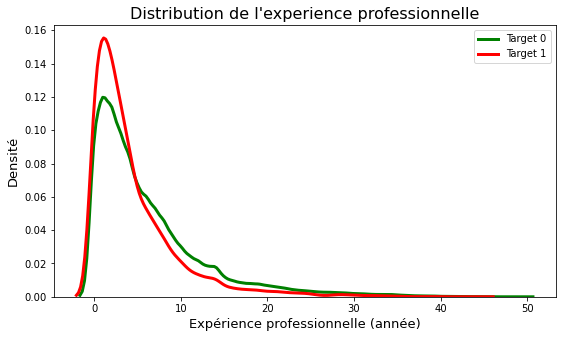

In [235]:
plt.figure(figsize = (9, 5))

sns.kdeplot(d1.loc[d1['TARGET'] == 0, 'Annee_travail'], label = 'target == 0', color = 'green', linewidth=3)
sns.kdeplot(d1.loc[d1['TARGET'] == 1, 'Annee_travail'], label = 'target == 1', color = 'red', linewidth=3)
plt.xlabel('Expérience professionnelle (année)', size = 13)
plt.ylabel('Densité', size = 13) 
plt.title("Distribution de l'experience professionnelle", size =16)
plt.legend(labels=["Target 0","Target 1"])

Entre 5 et 30 ans de travail avant la demande de crédit le client a plus de chance de rembourser dans les temps. Avant 5 ans il y a plus de risques de non remboursement et après 30 ans les risques sont égaux. Cependant il n'y a pas de risque de non remboursement après 45 ans d'experience dans ce jeu de données

C:\Users\sonas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


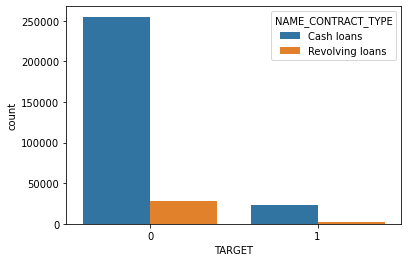

In [277]:
ax = sns.countplot(d1['TARGET'], hue = d1['NAME_CONTRACT_TYPE'])

Il ne semble pas avoir de difference dans les target pour les differents types de credit

C:\Users\sonas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

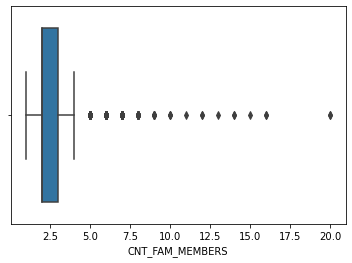

In [286]:
sns.boxplot(d1['CNT_FAM_MEMBERS'])

C:\Users\sonas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

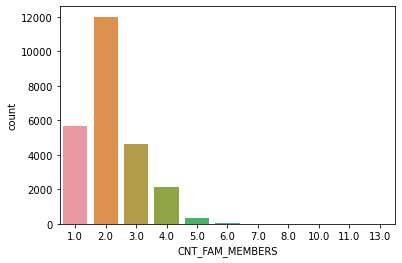

In [295]:
sns.countplot(d_def['CNT_FAM_MEMBERS'])

C:\Users\sonas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

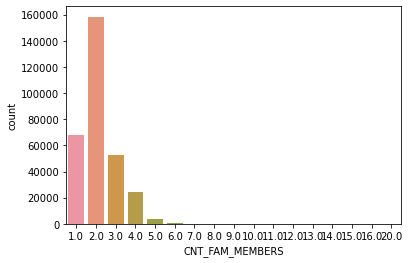

In [296]:
sns.countplot(d1['CNT_FAM_MEMBERS'])

Distribution identique donc pas d'inluence directe

In [42]:
d1['Percent_credit_revenu'] = d1['AMT_CREDIT'] / d1['AMT_INCOME_TOTAL']
d1['Percent_loyer_revenu'] = d1['AMT_ANNUITY'] / d1['AMT_INCOME_TOTAL']
d1['Duree'] = d1['AMT_ANNUITY'] / d1['AMT_CREDIT']

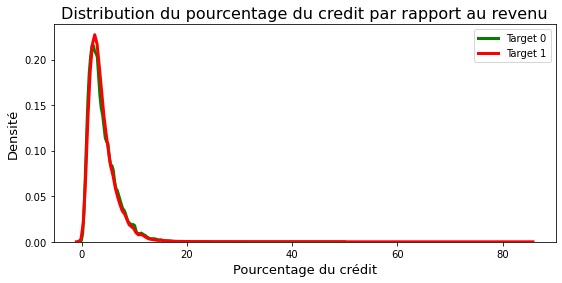

In [300]:
plt.figure(figsize = (9, 4))

sns.kdeplot(d1.loc[d1['TARGET'] == 0, 'Percent_credit_revenu'], label = 'target == 0', color = 'green', linewidth=3)
sns.kdeplot(d1.loc[d1['TARGET'] == 1, 'Percent_credit_revenu'], label = 'target == 1', color = 'red', linewidth=3)
plt.xlabel('Pourcentage du crédit', size = 13)
plt.ylabel('Densité', size = 13) 
plt.title("Distribution du pourcentage du credit par rapport au revenu", size =16)
plt.legend(labels=["Target 0","Target 1"])

In [48]:
d1 = d1.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis = 1)

# Enregistrer le fichier
d1.set_index("SK_ID_CURR").to_csv("d1_nettoyé.csv")

In [2]:
d1 = pd.read_csv("d1_nettoyé.csv")

#### Autres bases données

In [4]:
d2 = pd.read_csv("previous_application.csv")

d2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [17]:
# Garder les colonnes les plus intéressante
d2 = d2[['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
         'DAYS_TERMINATION', 'AMT_DOWN_PAYMENT' ]]

In [5]:
d3 = pd.read_csv("bureau.csv") 
d4 = pd.read_csv("bureau_balance.csv")

In [19]:
print(d3.shape)

d3.columns

(1716428, 9)


Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE'],
      dtype='object')

In [6]:
d3 = d3[['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 
        'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']]

Le d4 ne contient pas beaucoup d'informations utile pour la modélisation, nous ne l'utiliserons pas

In [340]:
d4 = pd.read_csv("credit_card_balance.csv")
d5 = pd.read_csv("POS_CASH_balance.csv")

Les fichiers "credit_card_balance.csv" et "POS_CASH_balance.csv" continnent les instantanés du solde mensuel des cartes de crédit précédentes que le demandeur a avec Home Credit. Nous n'allons pas les utiliser

In [344]:
# Historique des remboursement précédent
d6 = pd.read_csv("installments_payments.csv")

d6.columns
#Cette base de données ne sera pas utilisé non plus

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [20]:
from functools import reduce

# Merger les 3 bases de données 
data = [d1, d2, d3]
df = reduce(lambda  x, y: pd.merge(x, y, on=['SK_ID_CURR'], how='outer'), data)

df.shape

(9673993, 32)

# 2) Modélisation

## 2.1) Preprocessing

### 2.1.1) Imputer les valeurs manquantes

In [21]:
df.isnull().sum()

SK_ID_CURR                      0
TARGET                    1582471
NAME_CONTRACT_TYPE        1582471
CODE_GENDER               1582471
AMT_INCOME_TOTAL          1582471
AMT_CREDIT_x              1582471
AMT_ANNUITY_x             1582898
AMT_GOODS_PRICE_x         1588586
CNT_FAM_MEMBERS           1582473
EXT_SOURCE_1              5943021
EXT_SOURCE_2              1590662
EXT_SOURCE_3              1952924
Age                       1582471
Annee_travail             3113315
Percent_credit_revenu     1582471
Percent_loyer_revenu      1582898
Duree                     1582898
SK_ID_PREV                  67471
AMT_ANNUITY_y             2243315
AMT_APPLICATION             67471
AMT_CREDIT_y                67472
AMT_GOODS_PRICE_y         2272797
DAYS_TERMINATION          4183087
AMT_DOWN_PAYMENT          5267896
SK_ID_BUREAU               203159
CREDIT_ACTIVE              203159
CREDIT_DAY_OVERDUE         203159
DAYS_CREDIT_ENDDATE        818177
AMT_CREDIT_SUM             203231
AMT_CREDIT_SUM

Nous allons dans un premier temps supprimer toutes les lignes où il y a une valeur manquante au niveau du target mais aussi les colonnes en double et les identifiants des crédits précédent

In [22]:
df = df.dropna(subset = ['TARGET'])

# Supprimer les 3 colonnes qui sont en double
df = df.loc[:, ~df.columns.str.endswith('_y')]

#Supprimer les précédents identifiants
df.drop(['SK_ID_BUREAU', 'SK_ID_PREV'], axis = 1, inplace = True)

df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                 427
AMT_GOODS_PRICE_x            6115
CNT_FAM_MEMBERS                 2
EXT_SOURCE_1              4360550
EXT_SOURCE_2                 8191
EXT_SOURCE_3               370453
Age                             0
Annee_travail             1530844
Percent_credit_revenu           0
Percent_loyer_revenu          427
Duree                         427
AMT_APPLICATION             63876
DAYS_TERMINATION          3442496
AMT_DOWN_PAYMENT          4352323
CREDIT_ACTIVE              175485
CREDIT_DAY_OVERDUE         175485
DAYS_CREDIT_ENDDATE        683204
AMT_CREDIT_SUM             175497
AMT_CREDIT_SUM_DEBT       1394021
AMT_CREDIT_SUM_LIMIT      2882532
AMT_CREDIT_SUM_OVERDUE     175485
dtype: int64

In [6]:
# Enregistrer le fichier
df.set_index("SK_ID_CURR").to_csv("df_HomeCredit.csv")

In [7]:
df.fillna(df.median(), inplace = True)

### 2.1.2) Encodage des valeurs categorielles

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091522 entries, 0 to 8091521
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   TARGET                  float64
 2   NAME_CONTRACT_TYPE      object 
 3   CODE_GENDER             object 
 4   AMT_INCOME_TOTAL        float64
 5   AMT_CREDIT_x            float64
 6   AMT_ANNUITY_x           float64
 7   AMT_GOODS_PRICE_x       float64
 8   CNT_FAM_MEMBERS         float64
 9   EXT_SOURCE_1            float64
 10  EXT_SOURCE_2            float64
 11  EXT_SOURCE_3            float64
 12  Age                     float64
 13  Annee_travail           float64
 14  Percent_credit_revenu   float64
 15  Percent_loyer_revenu    float64
 16  Duree                   float64
 17  AMT_APPLICATION         float64
 18  CREDIT_ACTIVE           object 
 19  CREDIT_DAY_OVERDUE      float64
 20  DAYS_CREDIT_ENDDATE     float64
 21  AMT_CREDIT_SUM          float64

Il y a 3 features de type object. Ils ne' sont pas ordinal donc nous allons utiliser OneHotEncoder

In [8]:
df = pd.get_dummies(df)

df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,AMT_CREDIT_SUM_OVERDUE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,100002,1.0,202500.0,406597.5,24700.5,351000.0,1.0,0.083037,0.262949,0.139376,...,0.0,1,0,0,1,0,0,0,1,0
1,100002,1.0,202500.0,406597.5,24700.5,351000.0,1.0,0.083037,0.262949,0.139376,...,0.0,1,0,0,1,0,0,0,1,0
2,100002,1.0,202500.0,406597.5,24700.5,351000.0,1.0,0.083037,0.262949,0.139376,...,0.0,1,0,0,1,0,0,0,1,0
3,100002,1.0,202500.0,406597.5,24700.5,351000.0,1.0,0.083037,0.262949,0.139376,...,0.0,1,0,0,1,0,0,0,1,0
4,100002,1.0,202500.0,406597.5,24700.5,351000.0,1.0,0.083037,0.262949,0.139376,...,0.0,1,0,0,1,0,0,0,1,0


### 2.1.3) Normaliser les données

In [13]:
# Enregistrer le fichier
df.set_index("SK_ID_CURR").to_csv("df_HomeCredit_prep.csv")

In [5]:
df = pd.read_csv('df_HomeCredit.csv')

In [16]:
# Récupérer les features
X = df.iloc[:,2:]

# Et le target:
Y = df.iloc[:,1:2] 

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

### 2.1.4) Sous-échantillonnage

In [15]:
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

X, Y = make_classification(n_samples=8091522*3, n_features=27,
                            n_classes=2, weights=[0.05, 0.95],
                            n_informative=4, random_state=0)
SMOTETomek(n_jobs=-1, random_state=0).fit_resample(X, Y)

KeyboardInterrupt: 

In [14]:
X.shape

(8091522, 27)

Cette technique effectue un sous-échantillonnage en générant des centroïdes basés sur des méthodes de clustering. Les données seront préalablement regroupées par similarité, afin de préserver l'information

In [15]:
import imblearn
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, Y)

KeyboardInterrupt: 

C:\Users\sonas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


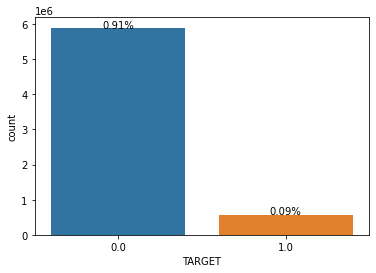

In [38]:
ax = sns.countplot(y_cc['TARGET'])

total = float(len(y_cc))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.2f}%'.format(height/total), ha="center") 

## 2.2) Modélisation

### Forêts Aléatoires

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 6473217 lignes,
Test: 1618305 lignes.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

<ipython-input-20-db6bd4c9de8a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


In [10]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [43]:
from collections import Counter

def normalize_binary(x, y, label):
 # initial columns list
    x_columns = df.columns
    y_column = 'label'
 # get class statistics
    counter = collections.Counter(y)
 # get size of minority class
    label_count = counter[label]

    # for extremely small classes& apply random oversammpling
    res_x, res_y = randomSampler.fit_resample(x, y)
    result_frame = pd.DataFrame(data=res_x, columns=x_columns)
    result_frame[y_column] = res_y
 # leave only minority class
    result_frame = result_frame[result_frame.label_column == label]
    print(Counter(result_frame['label']))
    return result_frame

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = { 'n_estimators': [140, 160],
    'max_features': [0.90, 0.99],
    'max_depth' : [15, 25]}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5)
grid.fit(X_train, Y_train)

C:\Users\sonas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [ ]:
print(grid2.best_score_)

grid2.best_params_

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = pipeline.Pipeline([('scaler', preprocessing.StandardScaler()), 
                              ('regressor', ensemble.HistGradientBoostingRegressor(**gsv.best_params_))])

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selection

num_features = make_column_selector(dtype_include = np.number)
cat_features = [""]

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

In [ ]:
preprocessor = make_column_transformer((num_pipeline, num_features),
                       (cat_pipeline, cat_features))

In [ ]:
model = make_pipeline(preprocessor, RandomForestClassifier())
model.fit(X, y)